# Pretest

Marc Pérez  
May 22, 2025

## Context

To explore, whether the proposed mechanisms and experiments to assess their dynamic, in a first step the Treatment levels $0P$ and $166P$ for all sites were analyzed. The experiments were conducted as displayed in the original paper of Flossmann & Richter with adjustments according to developments in technique and available equipment of the soil laboratory. Instead of the CAL-method, the Olsen-method was used to measure and estimate the quantity of P.

## Model of P-release after Flossman & Richter

$$\frac{dP}{dt}=k\times(P^S-P)$$ The constant $P^S$ denotes the amount of semi-labile P and was originally estimated as $P_\text{Olsen}-P_{H_2O}$. Subsequently the DE is solved exactly, since the soil is as $t=0$ mixed with deionized water, it was assumed that $P(0)=0$

## Exact Solution

$$P(t)=P^{\text{S}}-C\times e^{-kt}$$

for $P(0)=P_0$ we receive:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

If we set $P(0)=0$ we receive:

$$P(t)=P^S\times(1-e^{-kt})$$

## Linearization

Now we linearize the DE, so that a linear model can be employed to test the relation and estimate the parameters of interest:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

$$P(t)-P^S=-(P^S-P_0)\times e^{-kt}$$

$$P^S-P(t)=(P^S-P_0)\times e^{-kt}$$

$$1-\frac{P(t)}{P^S}=(1-\frac{P_0}{P^S})\times e^{-kt}$$

Given $P_0=0$,

$$log(1-\frac{P(t)}{P^S})=-kt$$

## Setup and preparation of dataset

In [ ]:
library(tidyr)
library(lme4)


Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList

Now we can see, whether our linearized model displays a linear relation.

Call:
  Model: Y1 ~ t.min. | uid 
   Data: d 

Coefficients:
   (Intercept) 
                       Estimate Std. Error     t value     Pr(>|t|)
Cadenazzo_0P_1      -0.12891945 0.03511973  -3.6708551 4.469113e-04
Cadenazzo_0P_2      -0.12037045 0.03511973  -3.4274305 9.866107e-04
Cadenazzo_166P_1    -0.26932199 0.03511973  -7.6686797 4.731057e-11
Cadenazzo_166P_2    -0.19243796 0.03511973  -5.4794822 5.325856e-07
Ellinghausen_0P_1   -0.10464296 0.03511973  -2.9796059 3.873686e-03
Ellinghausen_0P_2   -0.11438112 0.03511973  -3.2568902 1.684445e-03
Ellinghausen_166P_1 -0.70012081 0.03511973 -19.9352540 6.438545e-32
Ellinghausen_166P_2 -0.16852646 0.03511973  -4.7986256 7.805298e-06
Oensingen_0P_1      -0.03432646 0.03511973  -0.9774122 3.314662e-01
Oensingen_0P_2      -0.05745952 0.03511973  -1.6361036 1.059529e-01
Oensingen_166P_1    -0.13275856 0.03511973  -3.7801698 3.099301e-04
Oensingen_166P_2    -0.17051390 0.03511973  -4.8552162 6.281383e-06
Reckenholz_0P_1     -0.10545869 0.03511

`geom_smooth()` using formula = 'y ~ x'

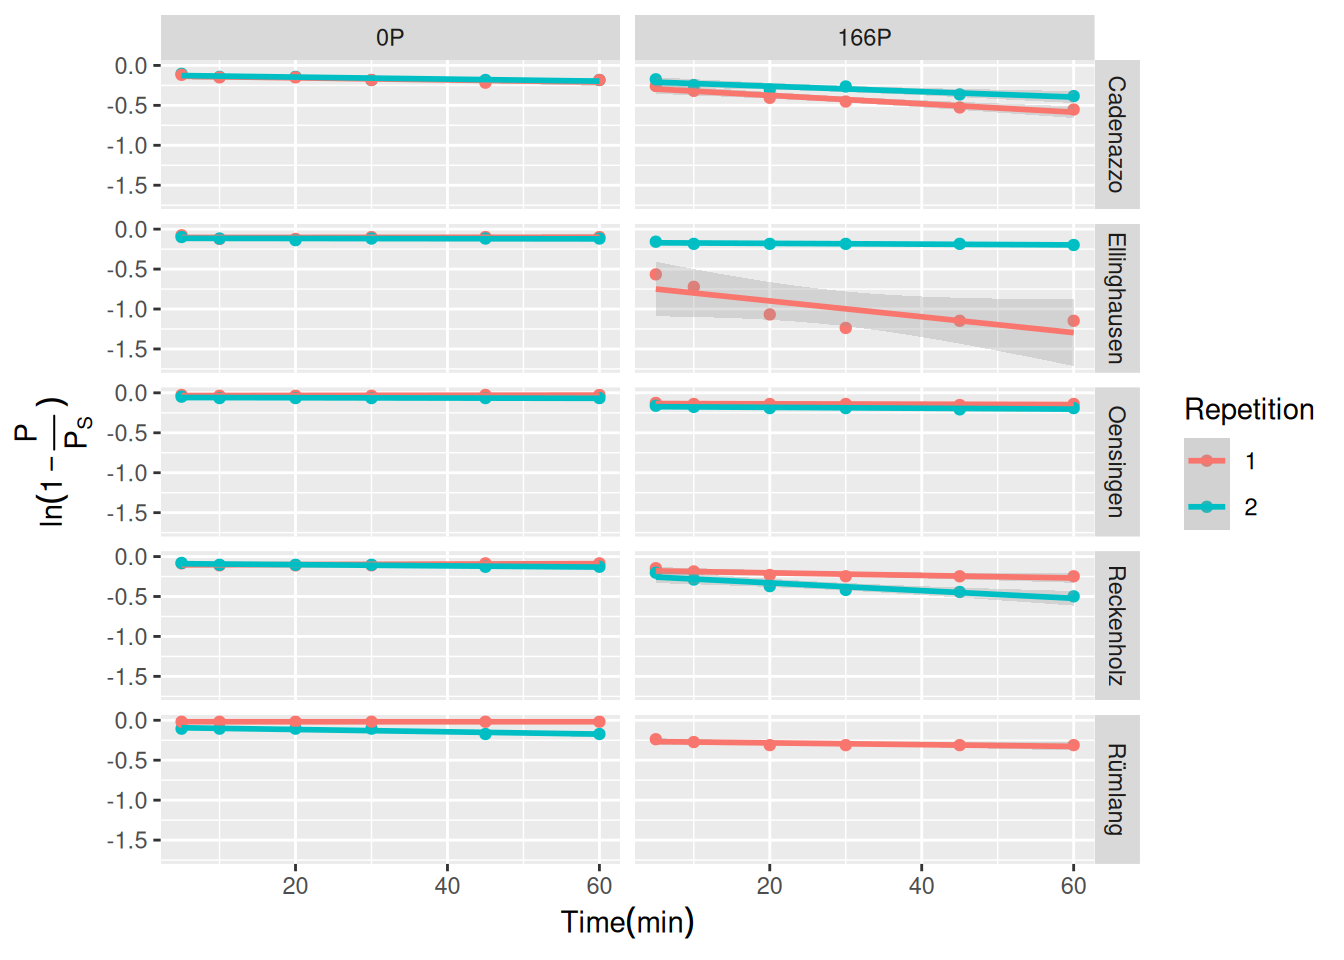

In [ ]:
res <- lmList(Y1 ~ t.min. | uid, d,na.action = na.pass)
summary(res)


If the parameter for the plateau could be estimated directly by using a non-linear non-least-squares model, we could omit the Olsen-measurement in the future.

Call:
  Model: Pv.mg.L. ~ PS * (1 - exp(-k * t.min.)) | uid 
   Data: d[, c("Pv.mg.L.", "uid", "t.min.")] 

Coefficients:
   PS 
                      Estimate  Std. Error   t value     Pr(>|t|)
Cadenazzo_0P_1      0.06070933 0.006367393  9.534409 7.288716e-05
Cadenazzo_0P_2      0.04823007 0.006449888  7.477660 2.041978e-05
Cadenazzo_166P_1    0.26046234 0.007080384 36.786472 3.535515e-05
Cadenazzo_166P_2    0.19714649 0.006831288 28.859341 1.016884e-04
Ellinghausen_0P_1   0.05381540 0.005788589  9.296807 6.183024e-05
Ellinghausen_0P_2   0.07242959 0.005737112 12.624746 4.089668e-06
Ellinghausen_166P_1 0.42710025 0.006031346 70.813425 1.520956e-06
Ellinghausen_166P_2 0.17258461 0.005648951 30.551621 1.161850e-07
Oensingen_0P_1      0.03588753 0.005646097  6.356166 1.721624e-04
Oensingen_0P_2      0.04031233 0.005880837  6.854864 1.796695e-07
Oensingen_166P_1    0.13227917 0.005571500 23.742113 3.312794e-07
Oensingen_166P_2    0.16110989 0.005680400 28.362420 6.041451e-07
Reckenholz_0P

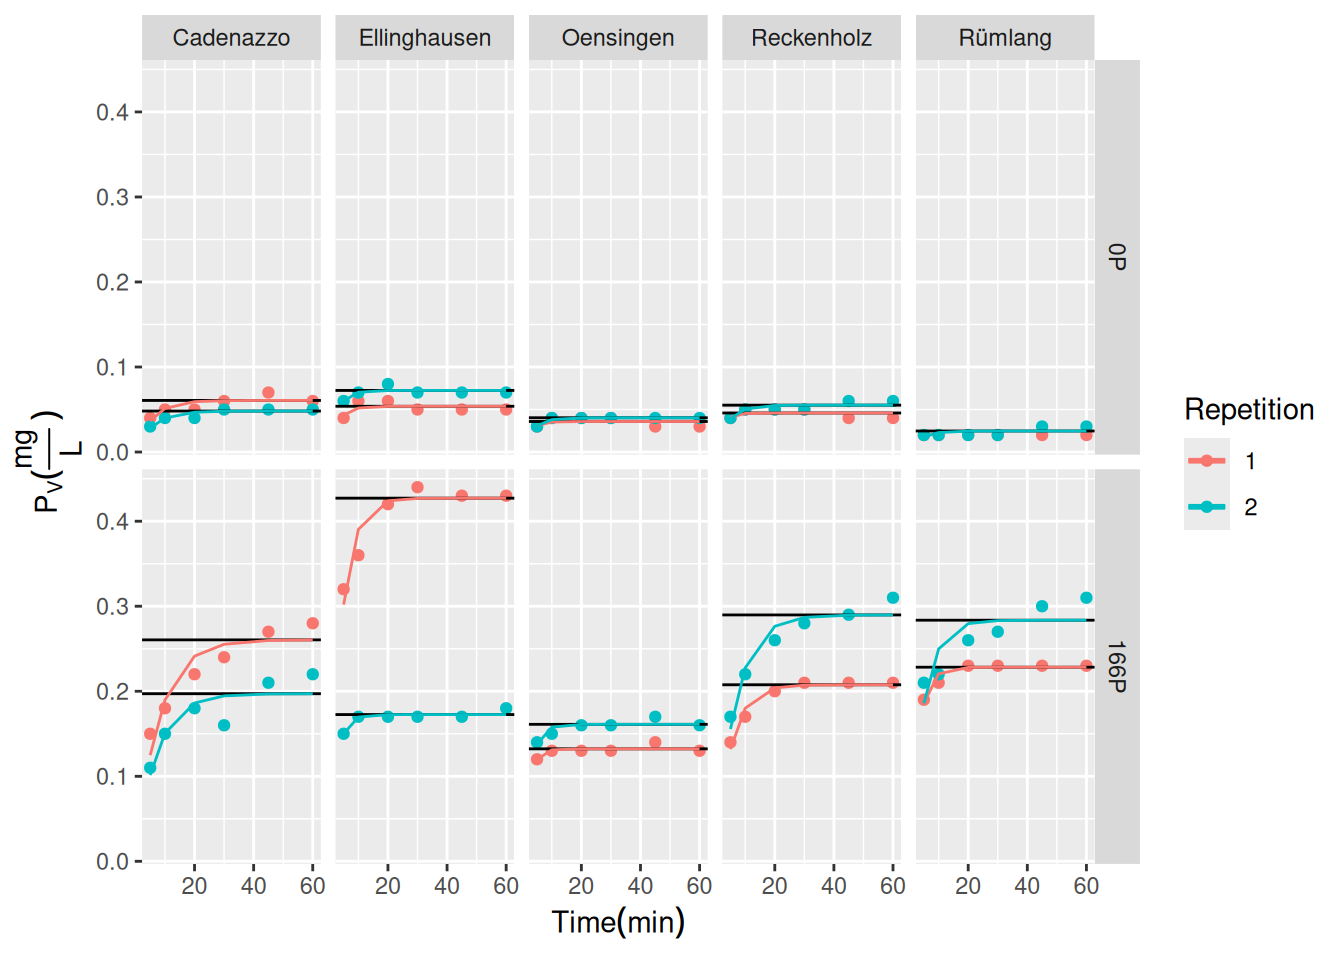

In [ ]:

Res <- nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * t.min.)) | uid, d[, c("Pv.mg.L.", "uid", "t.min.")],  start=list(PS=0.1,k=0.2))
summary(Res)


As a next step it is of interest, if the model parameters of method LM and method NLS compare favourably to observed values. We plot the measured labile P vs. the model Parameters.

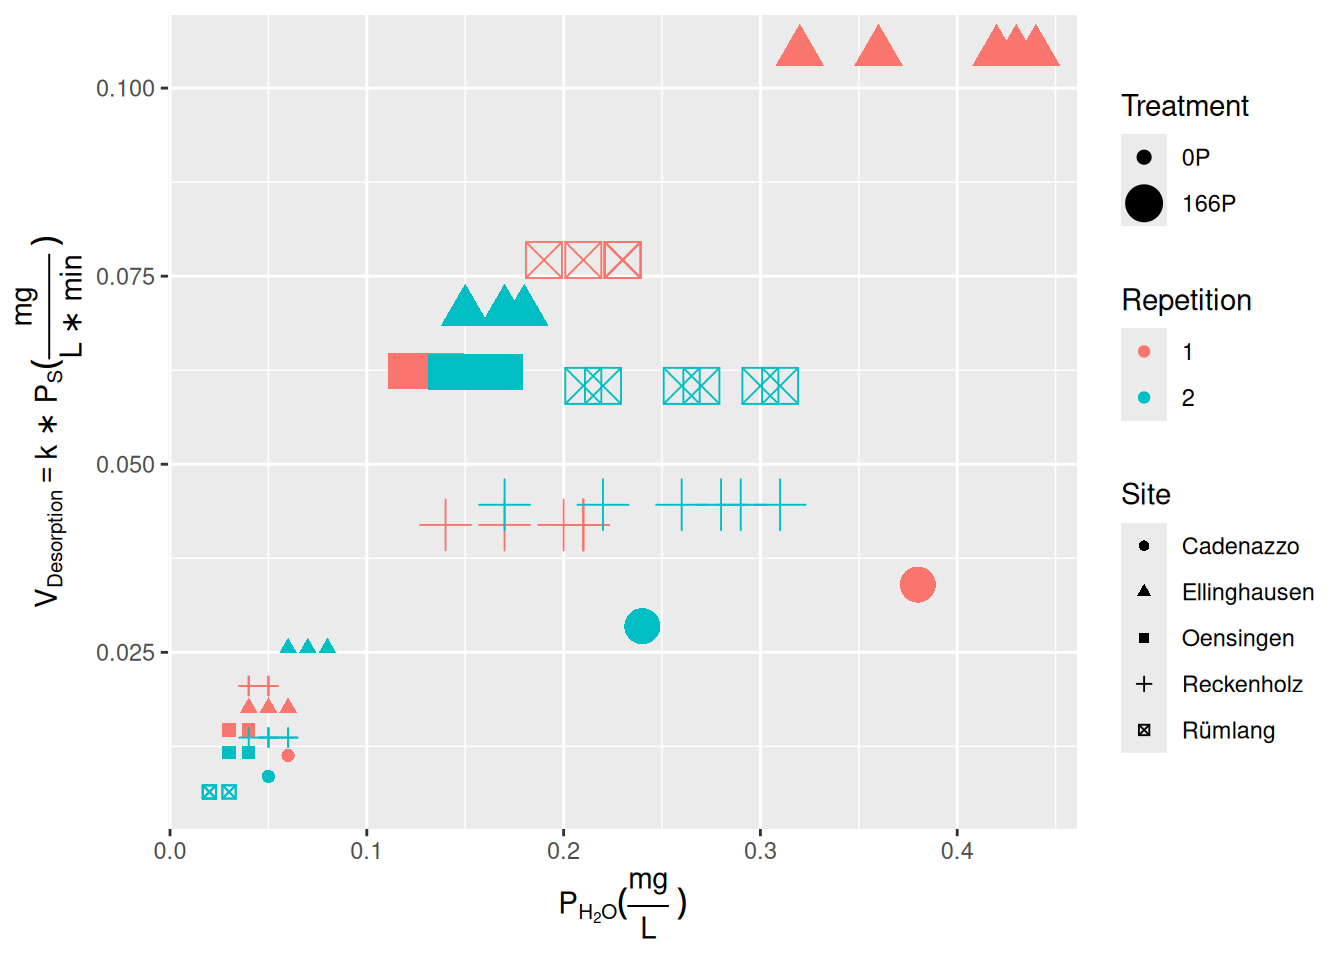

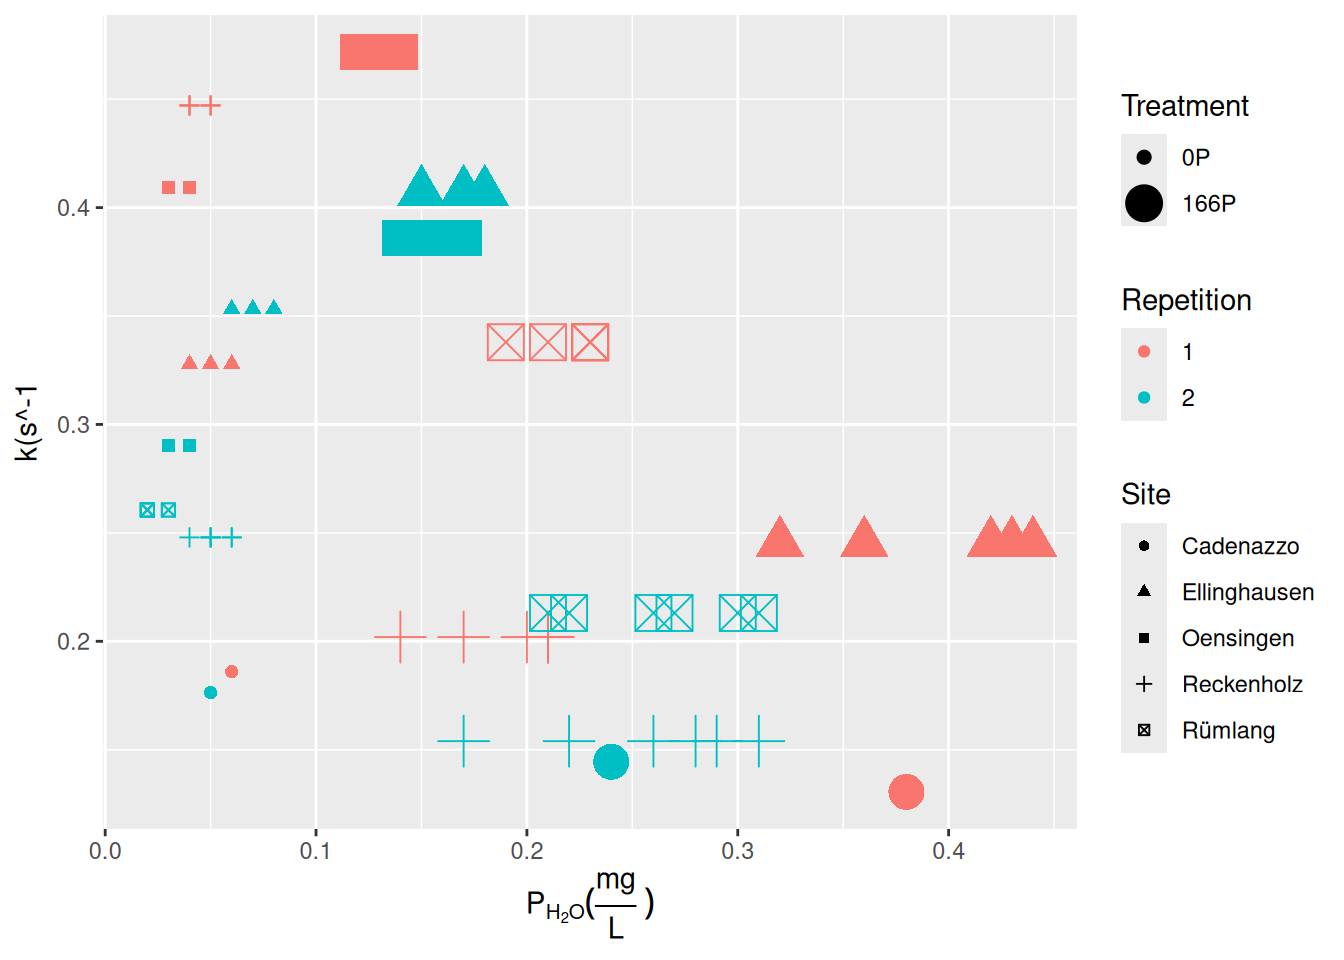

In [ ]:
p2 <- ggplot(d,aes(y=k*PS, x=Pv_labile.mg.L., col = Repetition, group = Site)) +
  geom_point(aes(shape=Site, size = Treatment)) +
  labs(x=TeX("$P_{H_2O}(\\frac{mg}{L})$"),
         y=TeX("$V_{Desorption}=k*P_S (\\frac{mg}{L*min})$"))
  #facet_grid(Site ~ Treatment) + 
  
p2
